In [298]:
# Dependencies
import requests, json, pprint, csv, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress

In [299]:
# Read CSV into Pandas DataFrame
olympics_df = pd.read_csv('olympics_df.csv')

olympics_df.tail()

,ID,Sex,Age,Height,Weight,NOC,Region,Medal,Sport,Event,Year,Season,City
271111,71419,M,37.0,166.0,60.0,COL,Colombia,NaN,Athletics,Athletics Men's 20 kilometres Walk,2016,Summer,Rio de Janeiro
271112,24610,M,20.0,152.0,53.0,ITA,Italy,NaN,Rowing,Rowing Men's Coxed Eights,2016,Summer,Rio de Janeiro
271113,24609,F,23.0,173.0,71.0,CAN,Canada,Bronze,Football,Football Women's Football,2016,Summer,Rio de Janeiro
271114,24621,M,21.0,194.0,85.0,ITA,Italy,NaN,Swimming,Swimming Men's 200 metres Freestyle,2016,Summer,Rio de Janeiro
271115,118650,M,26.0,185.0,83.0,NZL,New Zealand,NaN,Hockey,Hockey Men's Hockey,2016,Summer,Rio de Janeiro


In [300]:
olympics_df.count()

ID        271116
Sex       271116
Age       261642
Height    210945
Weight    208241
NOC       271116
Region    270746
Medal      39783
Sport     271116
Event     271116
Year      271116
Season    271116
City      271116
dtype: int64

---
## Number of events an athlete has participated in

In [301]:
olympics_groupedby_ID = olympics_df.groupby('ID')

event_count = olympics_groupedby_ID.count()['Sex'].sort_values(ascending=False)

event_count.head()

ID
77710     58
106296    39
115354    38
119591    36
44875     32
Name: Sex, dtype: int64

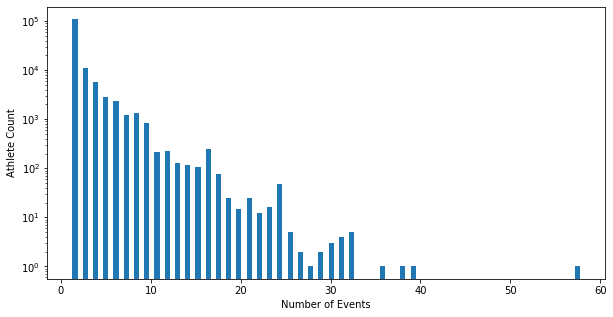

In [302]:
plt.figure(0,(10,5))
plt.hist(event_count, bins=50, log=True, rwidth=0.5)
plt.xlabel("Number of Events")
plt.ylabel("Athlete Count")
plt.show()

In [303]:
quartiles = event_count.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
median_temp = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Event Count is: {lowerq}")
print(f"The upper quartile of Event Count is: {upperq}")
print(f"The interquartile range of Event Count is: {iqr}")
print(f"The the median of Event Count is: {median_temp} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
#> print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Event Count is: 1.0
The upper quartile of Event Count is: 2.0
The interquartile range of Event Count is: 1.0
The the median of Event Count is: 1.0 
Values above 3.5 could be outliers.


## Number of events an athlete *who has medalled* has participated in

In [304]:
olympics_groupedby_ID_df = pd.DataFrame(olympics_groupedby_ID.count())

In [305]:
medalled_olymians_df = olympics_groupedby_ID_df.loc[olympics_groupedby_ID_df['Medal'] > 0]

In [306]:
medalled_groupedby_ID = medalled_olymians_df.groupby('ID')

medalled_event_count = medalled_groupedby_ID.max()['Sex'].sort_values(ascending=False)

medalled_event_count.head()

ID
77710     58
106296    39
119591    36
129196    32
89187     32
Name: Sex, dtype: int64

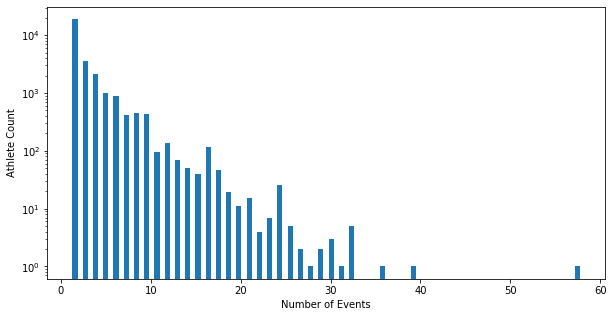

In [307]:
plt.figure(0,(10,5))
plt.hist(medalled_event_count, bins=50, log=True, rwidth=0.5)
plt.xlabel("Number of Events")
plt.ylabel("Athlete Count")
plt.show()

In [308]:
quartiles = medalled_event_count.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
median_temp = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Event Count is: {lowerq}")
print(f"The upper quartile of Event Count is: {upperq}")
print(f"The interquartile range of Event Count is: {iqr}")
print(f"The the median of Event Count is: {median_temp} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
#> print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Event Count is: 1.0
The upper quartile of Event Count is: 3.0
The interquartile range of Event Count is: 2.0
The the median of Event Count is: 2.0 
Values above 6.0 could be outliers.


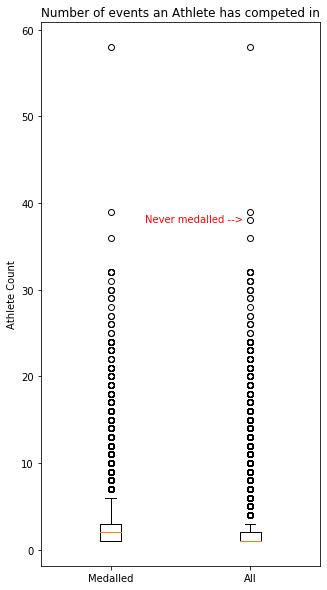

In [309]:
plt.figure(0,(5,10))
plt.title('Number of events an Athlete has competed in')
plt.ylabel('Athlete Count')
plt.boxplot([medalled_event_count, event_count])
plt.xticks([1,2],['Medalled', 'All'])

# Here we see someone who competed in 38 events yet never once medalled
plt.annotate('Never medalled -->',(1.25,37.75),fontsize=10,color="red")
plt.show()

#### So who is Athlete No. 115354?  
* Joseph "Josy" Stoffel, born June 27th, 1928 (currently age 91) went to 5 Summer Olympic games between 1948 to 1964.  From age 20 to 36 he competed on behalf of Luxembourg in 7-8 Gymnastics events per trip. Unfortunately he did not finish in the top three in any of his 38 competitions. But not for nothing, Stoffel dominated the domestic scene, and won the Luxembourgian national gymnastics championships for sixteen straight years, from 1949 until 1964.
---

## Female Medal Count vs Women's Freedom

In [310]:
# Read CSV into Pandas DataFrame
raw_WPS_df = pd.read_csv('raw_data/WPS_Index_Raw_Data.csv')
WPS_df = raw_WPS_df[[
 'WPS Index rank',
 'Country and group',
 'WPS Index value',
 'GDP per capita (PPP$; rank minus WPS rank)']]
WPS_df = WPS_df.rename(columns={'Country and group': 'Region'})
WPS_df.head()

,WPS Index rank,Region,WPS Index value,GDP per capita (PPP$; rank minus WPS rank)
0,1.0,Norway,0.904,7
1,2.0,Switzerland,0.893,5
2,3.0,Finland,0.891,18
3,3.0,Denmark,0.891,10
4,5.0,Iceland,0.888,6


In [311]:
WPS_df = WPS_df.dropna(how='all')
WPS_df.head(20)

,WPS Index rank,Region,WPS Index value,GDP per capita (PPP$; rank minus WPS rank)
0,1.0,Norway,0.904,7
1,2.0,Switzerland,0.893,5
2,3.0,Finland,0.891,18
3,3.0,Denmark,0.891,10
4,5.0,Iceland,0.888,6
5,6.0,Austria,0.884,7
6,7.0,United Kingdom,0.883,16
7,8.0,Luxembourg,0.880,-6
8,9.0,Sweden,0.879,7
9,9.0,Netherlands,0.879,2


In [312]:
slim_olympics_df = olympics_df.drop(['Height', 'Weight', 'City'],1)

In [313]:
recent_olympics_df = slim_olympics_df.loc[olympics_df.Year >= 2014]

In [314]:
recent_olympics_df = pd.merge(recent_olympics_df, WPS_df, on='Region', how='left')
recent_olympics_df.count()

ID                                            18579
Sex                                           18579
Age                                           18579
NOC                                           18579
Region                                        18534
Medal                                          2620
Sport                                         18579
Event                                         18579
Year                                          18579
Season                                        18579
WPS Index rank                                16958
WPS Index value                               16958
GDP per capita (PPP$; rank minus WPS rank)    16958
dtype: int64

In [315]:
medalled_recent_olympics_df = recent_olympics_df.loc[(recent_olympics_df.Medal == 'Gold') | 
                                                     (recent_olympics_df.Medal == 'Silver') | 
                                                     (recent_olympics_df.Medal == 'Bronze')]
medalled_recent_olympics_df.count()

ID                                            2620
Sex                                           2620
Age                                           2620
NOC                                           2620
Region                                        2619
Medal                                         2620
Sport                                         2620
Event                                         2620
Year                                          2620
Season                                        2620
WPS Index rank                                2394
WPS Index value                               2394
GDP per capita (PPP$; rank minus WPS rank)    2394
dtype: int64

In [316]:
medalled_recent_olympics_df = medalled_recent_olympics_df.dropna()

medalled_recent_olympics_df.count()

ID                                            2394
Sex                                           2394
Age                                           2394
NOC                                           2394
Region                                        2394
Medal                                         2394
Sport                                         2394
Event                                         2394
Year                                          2394
Season                                        2394
WPS Index rank                                2394
WPS Index value                               2394
GDP per capita (PPP$; rank minus WPS rank)    2394
dtype: int64

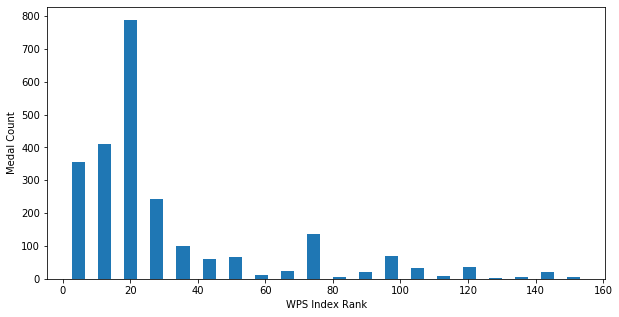

In [317]:
plt.figure(0,(10,5))
plt.hist(medalled_recent_olympics_df['WPS Index rank'], bins=20, rwidth=0.5)
plt.xlabel("WPS Index Rank")
plt.ylabel("Medal Count")
plt.show()

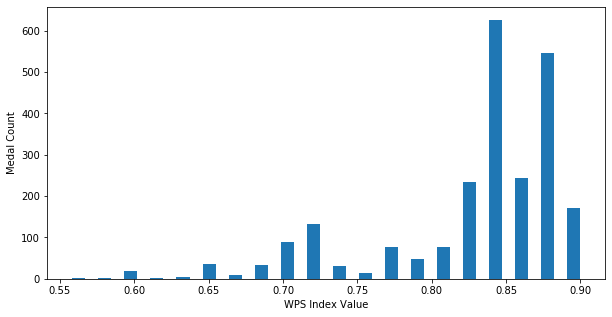

In [318]:
plt.figure(0,(10,5))
plt.hist(medalled_recent_olympics_df['WPS Index value'], bins=20, rwidth=0.5)
plt.xlabel("WPS Index Value")
plt.ylabel("Medal Count")
plt.show()

In [319]:
female_medalled_recent_olympics_df = medalled_recent_olympics_df.loc[
    medalled_recent_olympics_df.Sex == 'F']
male_medalled_recent_olympics_df = medalled_recent_olympics_df.loc[
    medalled_recent_olympics_df.Sex == 'M']

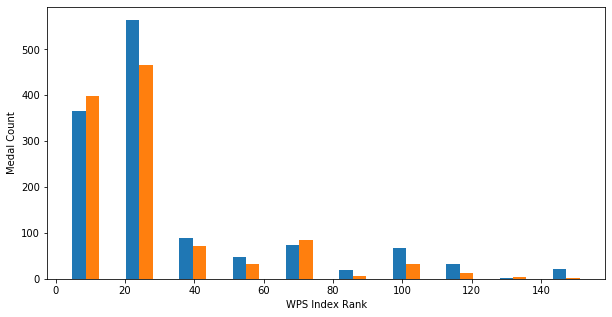

In [320]:
plt.figure(0,(10,5))
plt.hist([male_medalled_recent_olympics_df['WPS Index rank'], 
          female_medalled_recent_olympics_df['WPS Index rank']], 
         bins=10, rwidth=0.5)
plt.xlabel("WPS Index Rank")
plt.ylabel("Medal Count")
plt.show()

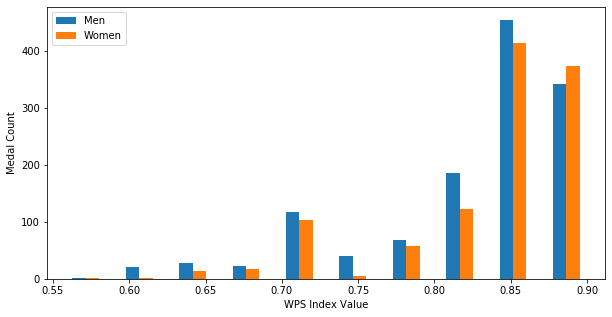

In [326]:
plt.figure(0,(10,5))
plt.hist([male_medalled_recent_olympics_df['WPS Index value'], 
          female_medalled_recent_olympics_df['WPS Index value']], 
         label=['Men', 'Women'], bins=10, rwidth=0.5)
plt.xlabel("WPS Index Value")
plt.ylabel("Medal Count")
plt.legend()
plt.show()

### These two histograms show that countries in the 90th percentile of women's freedom see their female athletes bring home more metals than their male athletes. 

In [327]:
female_medalled_groupedby_region = female_medalled_recent_olympics_df.groupby('Region')
male_medalled_groupedby_region = male_medalled_recent_olympics_df.groupby('Region')

gender_medalled_df = pd.merge(
    female_medalled_groupedby_region.ID.count(), 
    male_medalled_groupedby_region.ID.count(), 
    on='Region', how='outer', suffixes=['_F', '_M'])

gender_medalled_df = gender_medalled_df.fillna(0)

gender_medalled_df.tail(15)

,ID_F,ID_M
Region,,
United States of America,188.0,140.0
Algeria,0.0,2.0
Armenia,0.0,4.0
Dominican Republic,0.0,1.0
Estonia,0.0,4.0
Fiji,0.0,13.0
Georgia,0.0,7.0
Jordan,0.0,1.0
Morocco,0.0,1.0


In [328]:
gender_medalled_df = pd.merge(gender_medalled_df, WPS_df, 
                              on='Region', how='left')
gender_medalled_df

,Region,ID_F,ID_M,WPS Index rank,WPS Index value,GDP per capita (PPP$; rank minus WPS rank)
0,Argentina,2.0,20.0,48.0,0.775,8
1,Australia,41.0,44.0,22.0,0.844,-5
2,Austria,9.0,20.0,6.0,0.884,7
3,Azerbaijan,4.0,14.0,123.0,0.650,-56
4,Bahrain,2.0,0.0,83.0,0.719,-63
...,...,...,...,...,...,...
68,Nigeria,0.0,18.0,145.0,0.604,-29
69,Qatar,0.0,1.0,72.0,0.730,-70
70,Tajikistan,0.0,1.0,96.0,0.701,37
71,United Arab Emirates,0.0,1.0,44.0,0.781,-39


In [330]:
gender_medalled_df['Percent Male'] = round(
    100*gender_medalled_df.ID_M / (gender_medalled_df.ID_M + gender_medalled_df.ID_F),2)

gender_medalled_df['Percent Female'] = round(
    100*gender_medalled_df.ID_F / (gender_medalled_df.ID_M + gender_medalled_df.ID_F),2)

gender_medalled_df

,Region,ID_F,ID_M,WPS Index rank,WPS Index value,GDP per capita (PPP$; rank minus WPS rank),Percent Male,Percent Female
0,Argentina,2.0,20.0,48.0,0.775,8,90.91,9.09
1,Australia,41.0,44.0,22.0,0.844,-5,51.76,48.24
2,Austria,9.0,20.0,6.0,0.884,7,68.97,31.03
3,Azerbaijan,4.0,14.0,123.0,0.650,-56,77.78,22.22
4,Bahrain,2.0,0.0,83.0,0.719,-63,0.00,100.00
...,...,...,...,...,...,...,...,...
68,Nigeria,0.0,18.0,145.0,0.604,-29,100.00,0.00
69,Qatar,0.0,1.0,72.0,0.730,-70,100.00,0.00
70,Tajikistan,0.0,1.0,96.0,0.701,37,100.00,0.00
71,United Arab Emirates,0.0,1.0,44.0,0.781,-39,100.00,0.00


The r-squared is: 0.018533456774480254


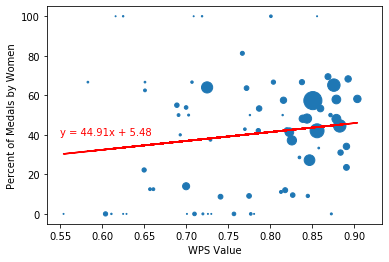

In [331]:
y_values = gender_medalled_df['Percent Female']
x_values = gender_medalled_df['WPS Index value']
z_values = gender_medalled_df['ID_M'] + gender_medalled_df['ID_F']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, s=z_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.55,40),fontsize=10,color="red")
plt.ylabel('Percent of Medals by Women')
plt.xlabel('WPS Value')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The correlation value (r) is: 0.3953207382900704


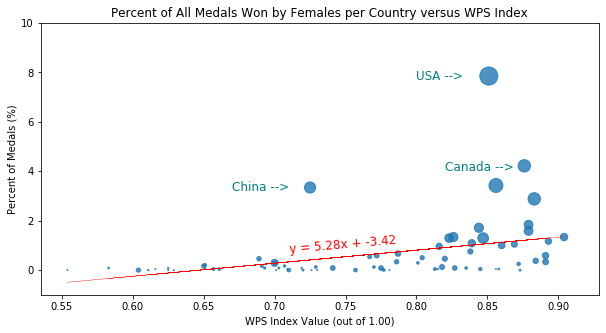

In [381]:
y_values = gender_medalled_df['Percent Female']*(
    (gender_medalled_df.ID_M + gender_medalled_df.ID_F)/(gender_medalled_df.ID_M.sum() + gender_medalled_df.ID_F.sum()))
x_values = gender_medalled_df['WPS Index value']
z_values = gender_medalled_df['ID_M'] + gender_medalled_df['ID_F']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(0,(10,5))
plt.scatter(x_values, y_values, s=z_values,alpha=.8)
plt.plot(x_values,regress_values,"r-",lw=.2)
plt.annotate(line_eq,(.71,.7),fontsize=12,color="red", rotation=5)
plt.annotate('USA -->',(.80,7.7),fontsize=12,color="teal")
plt.annotate('Canada -->',(.82,4.0),fontsize=12,color="teal")
plt.annotate('China -->',(.67,3.2),fontsize=12,color="teal")
plt.title('Percent of All Medals Won by Females per Country versus WPS Index')
plt.xlabel('WPS Index Value (out of 1.00)')
plt.ylabel('Percent of Medals (%)')
plt.ylim(-1,10)
print(f"The correlation value (r) is: {rvalue}")
plt.show()

In [369]:
gender_medalled_df.sort_values('ID_F', ascending=False)

,Region,ID_F,ID_M,WPS Index rank,WPS Index value,GDP per capita (PPP$; rank minus WPS rank),Percent Male,Percent Female
58,United States of America,188.0,140.0,19.0,0.851,-10,42.68,57.32
10,Canada,101.0,54.0,11.0,0.876,9,34.84,65.16
20,Germany,82.0,113.0,17.0,0.856,-2,57.95,42.05
11,China,80.0,45.0,76.0,0.725,-7,36.00,64.00
57,United Kingdom,69.0,86.0,7.0,0.883,16,55.48,44.52
...,...,...,...,...,...,...,...,...
62,Estonia,0.0,4.0,12.0,0.873,23,100.00,0.00
61,Dominican Republic,0.0,1.0,74.0,0.726,-2,100.00,0.00
60,Armenia,0.0,4.0,82.0,0.720,11,100.00,0.00
59,Algeria,0.0,2.0,143.0,0.611,-66,100.00,0.00
